In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
import numpy as np
model = Sequential()
model.add(Conv2D(30, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (5, 5), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(units = 120, activation = 'relu'))
model.add(Dense(units = 148, activation = 'relu'))
model.add(Dense(units = 130, activation = 'relu'))
model.add(Dense(units = 115, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.4,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Fruits Dataset/Train',target_size=(64,64),batch_size=8,class_mode='binary')
test_set=test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Fruits Dataset/Test',target_size=(64,64),batch_size=8,class_mode='binary')

Found 80 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [ ]:
model.fit(training_set,steps_per_epoch=20,epochs=7)

Epoch 1/7
10/20 [==============>...............] - ETA: 17s - loss: 0.6925 - accuracy: 0.5500

20/20 [==============================] - 19s 820ms/step - loss: 0.6925 - accuracy: 0.5500


In [ ]:
test_loss, test_acc = model.evaluate(test_set, verbose=4)
print('\n\n')
print('Test Loss: \t',test_loss,'\n')
print('Test accuracy:\t', test_acc,'\n')




Test Loss: 	 0.6932938098907471 

Test accuracy:	 0.625 



# transform learning


In [ ]:
import tensorflow as tf

resnet_model=Sequential()

pertrained_model = tf.keras.applications.ResNet50(input_shape=[64, 64, 3],
                                               include_top=False,
                                               pooling='avg',
                                               classes=2,
                                               weights='imagenet')

for layer in pertrained_model.layers:
  layer.trainable = False #dont want to train the model again because we have perviously trained it

resnet_model.add(pertrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(511, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))

resnet_model.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])


model.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.4,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Fruits Dataset/Train',target_size=(64,64),batch_size=8,class_mode='binary')
test_set=test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Fruits Dataset/Test',target_size=(64,64),batch_size=8,class_mode='binary')
model.fit(training_set,steps_per_epoch=20,epochs=4)
test_loss, test_acc = model.evaluate(test_set, verbose=4)
print('\n\n')
print('Test Loss: \t',test_loss,'\n')
print('Test accuracy:\t', test_acc,'\n')

Found 80 images belonging to 2 classes.
Found 8 images belonging to 2 classes.
Epoch 1/4
10/20 [==============>...............] - ETA: 20s - loss: 0.6911 - accuracy: 0.5000

20/20 [==============================] - 29s 974ms/step - loss: 0.6911 - accuracy: 0.5000



Test Loss: 	 0.6930242776870728 

Test accuracy:	 0.625 



In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg_model=Sequential()
base_model=VGG16(weights='imagenet',include_top=False,input_shape=(64,64,3))
base_model.trainable=False
vgg_model.add(base_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(512,activation='relu'))
vgg_model.add(Dense(1,activation='sigmoid'))
vgg_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

vgg_model.fit(training_set,steps_per_epoch=20,epochs=3)

test_loss, test_acc = model.evaluate(test_set, verbose=4)
print('\n\n')
print('Test Loss: \t',test_loss,'\n')
print('Test accuracy:\t', test_acc,'\n')

Epoch 1/3
10/20 [==============>...............] - ETA: 20s - loss: 0.2849 - accuracy: 0.8750

20/20 [==============================] - 30s 956ms/step - loss: 0.2849 - accuracy: 0.8750



Test Loss: 	 0.6930242776870728 

Test accuracy:	 0.625 



In [ ]:
!pip install lime
import lime
from lime import lime_image

In [ ]:
!pip install shap
import shap
print(type(test_set))
tmp1, tmp2 =next(test_set)
#print(tmp1,tmp2)
background =shap.utils.sample(tmp1,5)
explainer = shap.DeepExplainer(model, background)
sample_index=np.random.randint(0,background.shape[0])
sample_image=background[sample_index]
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(background[sample_index].astype('double'), model.predict, hide_color=0, num_samples=1000)

<class 'keras.src.preprocessing.image.DirectoryIterator'>


/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 56ms/step


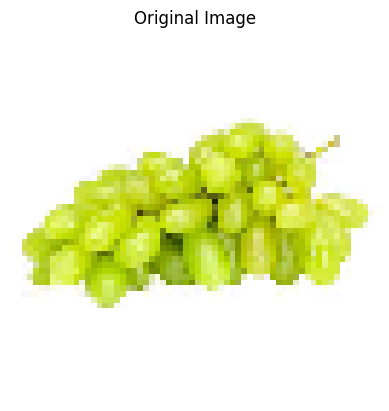

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(background[sample_index])
plt.title('Original Image')
plt.axis('off')
plt.show()

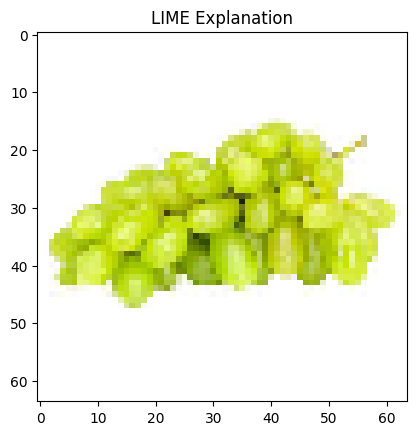

In [ ]:
!pip install lime shap
import shap
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))
plt.title("LIME Explanation")
plt.show()
